In [46]:
%matplotlib inline
import numpy as np
import scipy.interpolate
import scipy.signal
import matplotlib.pyplot as plt

# Linear interpolation

In [47]:
nx = 101
x = np.arange(nx, dtype=np.float32)

In [48]:
sigma = 1.5
mean = 50.
y = np.exp(- 0.5 * (x - mean)**2 / sigma**2)

(42.0, 58.0)

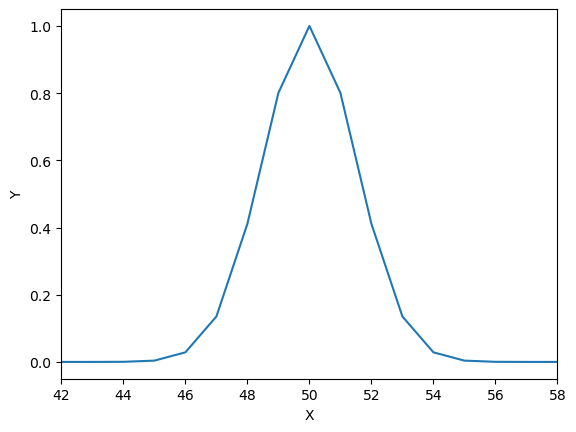

In [49]:
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim([42, 58])

In [50]:
# This only works for a subpixel shift with pixel spacing of 1
shift_value = 0.32
xshift = x + shift_value
yshift = np.zeros(nx, dtype=np.float32)
yshift[:-1] = y[:-1] + (y[1:] - y[:-1]) * shift_value

(42.0, 58.0)

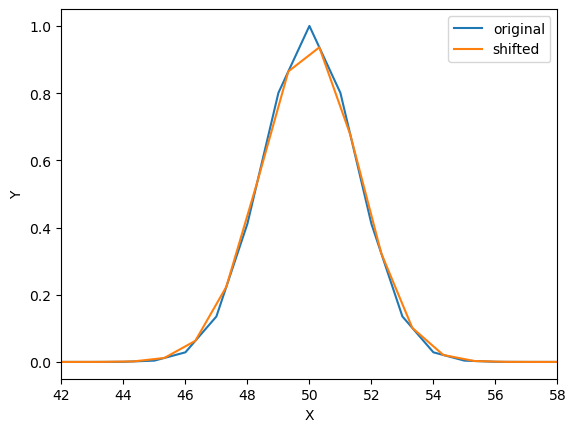

In [51]:
plt.plot(x, y, label='original')
plt.plot(xshift, yshift, label='shifted')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.xlim([42, 58])

In [52]:
# This only works for a subpixel shift with pixel spacing of 1
xshiftback = x
yshiftback = np.zeros(nx, dtype=np.float32)
yshiftback[1:] = yshift[1:] + (yshift[0:-1] - yshift[1:]) * shift_value

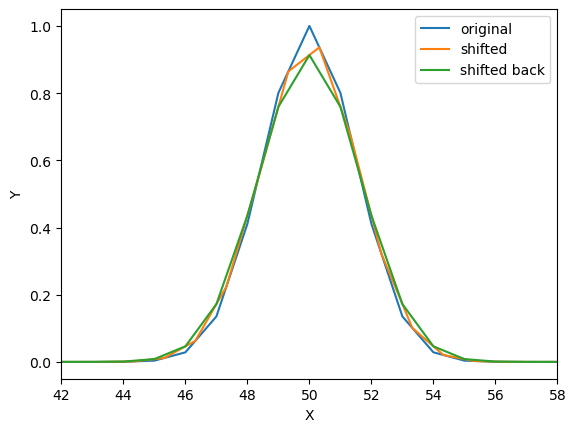

In [53]:
plt.plot(x, y, label='original')
plt.plot(xshift, yshift, label='shifted')
plt.plot(xshiftback, yshiftback, label='shifted back')
plt.xlim([42, 58])
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

If you are using interpolation in earnest, though, use scipy's interp1d:

In [54]:
interpolator = scipy.interpolate.interp1d(x, y, kind='linear', bounds_error=False, fill_value=0.)

In [ ]:
print(interpolator(np.arange(nx) + 0.2))

# Polynomial interpolation

In [91]:
npoly = 15
xpoly = (x[50-npoly//2:50+npoly//2 + 1] - 50.) / np.float32(npoly // 2)
ypoly = y[50-npoly//2:50+npoly//2 + 1]

Text(0, 0.5, 'Y')

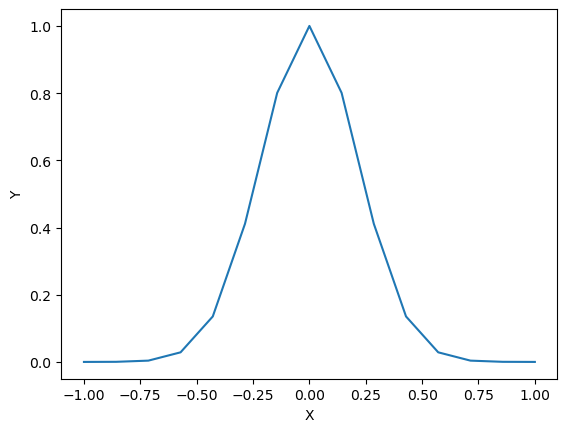

In [92]:
plt.plot(xpoly, ypoly)
plt.xlabel('X')
plt.ylabel('Y')

In [93]:
npoly = len(xpoly)
B = np.zeros((npoly, npoly))
for i in np.arange(npoly, dtype=np.int32):
    B[:, i] = xpoly**i

In [94]:
Binv = np.linalg.inv(B)

In [95]:
a = Binv.dot(ypoly)

In [96]:
nfine = 200
Bfine = np.zeros((nfine, npoly), dtype=np.float32)
xfine = -1. + 2. * (np.arange(nfine) + 0.5) / np.float32(nfine)
for i in np.arange(npoly, dtype=np.int32):
    Bfine[:, i] = xfine**i

In [97]:
yfine = Bfine.dot(a)

In [98]:
W = Bfine.dot(Binv)
W.shape

(200, 15)

In [99]:
yfine = W.dot(ypoly)

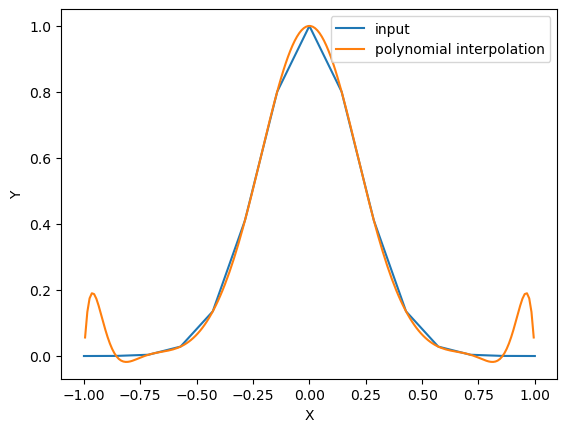

In [100]:
plt.plot(xpoly, ypoly, label='input')
plt.plot(xfine, yfine, label='polynomial interpolation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [101]:
print(W.shape)

(200, 15)


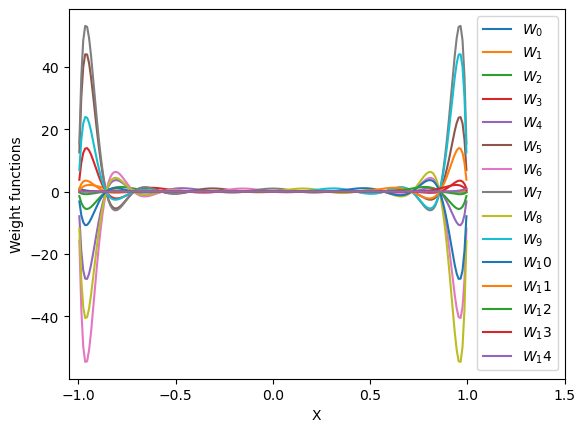

In [104]:
for i in np.arange(npoly):
    plt.plot(xfine, W[:, i], label='$W_{i}$'.format(i=i))
plt.xlabel('X')
plt.ylabel('Weight functions')
plt.xlim([-1.05, 1.5])
plt.legend()

In [75]:
i = 3
lagrange = np.ones(nfine, dtype=np.float32)
for j in np.arange(npoly):
    if(i != j):
        lagrange = lagrange * (xfine - xpoly[j]) / (xpoly[i] - xpoly[j])

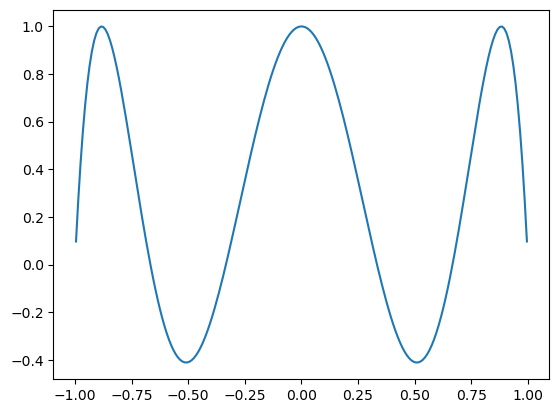

In [76]:
plt.plot(xfine, lagrange)

# Lanczos Resampling